In [1]:
# Load library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
%matplotlib inline

## Import Data 

In [2]:
# Create URL
#test_csv = "~/COMP30027_2021_Project2_datasets/recipe_test.csv"
#train_csv = "~/COMP30027_2021_Project2_datasets/recipe_train.csv"

test_csv_2 = "C:\\Users\\kenne\\recipe-cooktime-predictor data\\COMP30027_2021_Project2_datasets\\recipe_test.csv"
train_csv_2 = "C:\\Users\\kenne\\recipe-cooktime-predictor data\\COMP30027_2021_Project2_datasets\\recipe_train.csv"

# Load Dataset 
test_df = pd.read_csv(test_csv_2)
train_df = pd.read_csv(train_csv_2)

#test_df = pd.read_csv(test_csv )
#train_df = pd.read_csv(train_csv)

In [3]:
import pickle
name = pickle.load(open("C:\\Users\\kenne\\recipe-cooktime-predictor data\\COMP30027_2021_Project2_datasets\\recipe_text_features_countvec\\train_name_countvectorizer.pkl", "rb"))
name_dict = name.vocabulary_

steps = pickle.load(open("C:\\Users\\kenne\\recipe-cooktime-predictor data\\COMP30027_2021_Project2_datasets\\recipe_text_features_countvec\\train_steps_countvectorizer.pkl", "rb"))
steps_dict = steps.vocabulary_

ingr = pickle.load(open("C:\\Users\\kenne\\recipe-cooktime-predictor data\\COMP30027_2021_Project2_datasets\\recipe_text_features_countvec\\train_ingr_countvectorizer.pkl", "rb"))

c:\users\kenne\python\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [4]:
import scipy
scipy.sparse.load_npz('C:\\Users\\kenne\\recipe-cooktime-predictor data\\COMP30027_2021_Project2_datasets\\recipe_text_features_countvec\\train_name_vec.npz')

<40000x10892 sparse matrix of type '<class 'numpy.int64'>'
	with 152716 stored elements in Compressed Sparse Row format>

In [41]:
name_50 = pd.read_csv(r"C:\\Users\\kenne\\recipe-cooktime-predictor data\\COMP30027_2021_Project2_datasets\\recipe_text_features_doc2vec50\\recipe_text_features_doc2vec50\\train_name_doc2vec50.csv", index_col = False, delimiter = ',', header=None)

In [5]:
X = train_df[['n_steps', 'n_ingredients']]
y = train_df['duration_label']

## Data Modelling

In [13]:
one_r = DecisionTreeClassifier(max_depth=1)
one_r.fit(X, y)
dt = DecisionTreeClassifier(max_depth=None)
dt.fit(X, y)

DecisionTreeClassifier()

In [14]:
one_r_acc = one_r.score(X,y)
dt_acc = dt.score(X,y)
print("1-R accuracy: {}; DT accuracy: {}".format(one_r_acc, dt_acc))

1-R accuracy: 0.62165; DT accuracy: 0.644125


In [16]:
test_id = test_df.index
data = {'id': test_id+1, 'duration_label': ybar}
df = pd.DataFrame(data)
df.to_csv('predict.csv', index=False)

In [21]:
C = 1.0
linear_svc = svm.SVC(kernel='linear', C=C)

#linear_svc.fit(X,y)

#linear_svc_acc = linear_svc.score(X,y)
#print("Linear SVC accuracy: {}".format(linear_svc_acc))

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


#try to change C to 1000 or 0.001
C = 1.0  # SVM regularization parameter

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn_acc = knn.score(X,y)
print("kNN accuracy: {}".format(knn_acc))

kNN accuracy: 0.598675


In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)
log_reg_acc = log_reg.score(X,y)
print("Logistic Regression accuracy: {}".format(log_reg_acc))

Logistic Regression accuracy: 0.637025


### CountVec

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectoriser = CountVectorizer()

name_train = train_df['name'].values
name_test = test_df['name'].values
X_train = vectoriser.fit_transform(name_train)
X_test = vectoriser.transform(name_test)
print(X_train.shape, X_test.shape)

(40000, 11072) (10000, 11072)


### Chi-sq

In [7]:
from sklearn.feature_selection import SelectKBest, chi2

x2 = SelectKBest(chi2, k=10)

X_train_x2 = x2.fit_transform(X_train,y)
X_test_x2 = x2.transform(X_test)

for feat_num in x2.get_support(indices=True):
    print(vectoriser.get_feature_names()[feat_num])

beef
cake
casserole
cooker
crock
crockpot
pot
roast
salad
slow


In [13]:
k=1000
x2 = SelectKBest(chi2, k=k)
x2.fit(X_train,y)
X_train_x2 = x2.transform(X_train)
X_test_x2 = x2.transform(X_test)

### Mutual Information

In [32]:
from sklearn.feature_selection import mutual_info_classif
mi = SelectKBest(score_func=mutual_info_classif, k=10)
X_train_mi = mi.fit_transform(X_train,y)
X_test_mi = mi.transform(X_test)

print(X_test_mi.shape, X_train_mi.shape)

for feat_num in mi.get_support(indices=True):
    print(vectoriser.get_feature_names()[feat_num])

(10000, 10) (40000, 10)
beef
cake
casserole
chicken
cooker
crock
pot
roast
salad
slow


In [34]:
k=1000
mi = SelectKBest(score_func=mutual_info_classif, k=k)
mi.fit(X_train,y)
X_train_mi = mi.transform(X_train)
X_test_mi = mi.transform(X_test)

<10000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 28138 stored elements in Compressed Sparse Row format>

In [35]:
print(X_test_mi)

  (0, 159)	1
  (0, 238)	1
  (1, 304)	1
  (1, 393)	1
  (1, 980)	1
  (2, 169)	1
  (3, 40)	1
  (3, 86)	1
  (3, 598)	1
  (4, 159)	1
  (4, 587)	1
  (4, 715)	1
  (5, 159)	1
  (5, 240)	1
  (5, 329)	1
  (5, 591)	1
  (6, 154)	1
  (6, 825)	1
  (7, 71)	1
  (7, 496)	1
  (8, 409)	1
  (8, 508)	1
  (9, 159)	1
  (9, 607)	1
  (9, 737)	1
  :	:
  (9991, 459)	1
  (9992, 237)	1
  (9993, 159)	1
  (9993, 607)	1
  (9994, 54)	1
  (9994, 159)	1
  (9994, 448)	1
  (9994, 586)	1
  (9994, 614)	1
  (9995, 51)	1
  (9995, 140)	1
  (9995, 365)	1
  (9996, 13)	1
  (9997, 268)	1
  (9997, 778)	1
  (9997, 932)	1
  (9998, 51)	1
  (9998, 121)	1
  (9998, 729)	1
  (9998, 810)	1
  (9998, 951)	1
  (9999, 13)	1
  (9999, 51)	1
  (9999, 362)	1
  (9999, 740)	1


### Test Accuracy with MI

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train_mi.todense(), y)
acc = MNB.score(X_train_mi.todense(), y)
print(acc)

0.708


In [28]:
#X_test = test_df[['name']]
ybar = MNB.predict(X_test_mi)

In [12]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_mi.todense(), y)
log = MNB.score(X_train_mi.todense(), y)
print(acc)

c:\users\kenne\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.708


### Test Accuracy with Chisq

In [17]:
MNB = MultinomialNB()
MNB.fit(X_train_x2.todense(), y)
acc = MNB.score(X_train_x2.todense(), y)
print(acc)

0.69615


In [18]:
log = LogisticRegression()
log.fit(X_train_x2.todense(), y)
log = MNB.score(X_train_x2.todense(), y)
print(acc)

c:\users\kenne\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.69615


### Combinations

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

models = [GaussianNB(),
          MultinomialNB(),
          KNeighborsClassifier(n_neighbors=5),
          DecisionTreeClassifier(max_depth=None)]
#          svm.LinearSVC(C=C),
#          svm.SVC(kernel='rbf', gamma=0.7, C=C),
#          svm.SVC(kernel='poly', degree=3, C=C)]
titles = ['GNB',
          'MNB',
          '5-nearest neighbour',
          'Decision Tree']
#          'LinearSVC',
#          'SVM with a cubic kernel',
#          'SVM with an RBF kernel']

Xs = [(X_train, X_test), (X_train_x2, X_test_x2), (X_train_mi, X_test_mi)]
X_names = ['complete', 'x2', 'mi']
for title, model in zip(titles, models):
    print('\n',title, '(with k=',k,'features):')
    for X_name, X in zip(X_names, Xs):
        X_train_t, X_test_t = X
        model.fit(X_train_t.todense(), y)
        acc = model.score(X_train_t.todense(), y)
        print(X_name, 'acc',  acc)

## Model Selection

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
models = [GaussianNB(),
          MultinomialNB(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LogisticRegression()]
titles = ['GNB',
          'MNB',
          'Decision Tree',
          'KNN',
          'Logistic Regression']

for title, model in zip(titles, models):
    model.fit(X,y)
    acc = model.score(X,y)
    print(title, "Accuracy:",acc)

GNB Accuracy: 0.619575
MNB Accuracy: 0.523575
Decision Tree Accuracy: 0.644125
KNN Accuracy: 0.598675
Logistic Regression Accuracy: 0.637025


In [27]:
from sklearn.model_selection import cross_val_score

models = [GaussianNB(),
          MultinomialNB(),
          DecisionTreeClassifier(),
          KNeighborsClassifier(),
          LogisticRegression()]

for title, model in zip(titles, models):
    acc = np.mean(cross_val_score(model, X, y, cv=10))
    
    print(title, "Accuracy:",acc)

GNB Accuracy: 0.6193
MNB Accuracy: 0.523475
Decision Tree Accuracy: 0.6340250000000001
KNN Accuracy: 0.590725
Logistic Regression Accuracy: 0.637


## Create csv file for Kaggle

In [29]:
test_id = test_df.index
data = {'id': test_id+1, 'duration_label': ybar}
df = pd.DataFrame(data)
df.to_csv('predict.csv', index=False)

## Model Testing

In [21]:
from sklearn.model_selection import cross_validate

log = LogisticRegression()
log.fit(X, y)

LogisticRegression()

In [36]:
X_test = test_df[['n_steps', 'n_ingredients']]
ybar = log.predict(X_test)
print(X_test)

      n_steps  n_ingredients
0           9             13
1           3              3
2           8             11
3           9              6
4           9             10
...       ...            ...
9995        6             10
9996        6              9
9997        2              6
9998       10             11
9999       12             13

[10000 rows x 2 columns]


In [ ]:
test_id = test_df.index
data = {'id': test_id+1, 'duration_label': ybar}
df = pd.DataFrame(data)
df.to_csv('predict.csv', index=False)

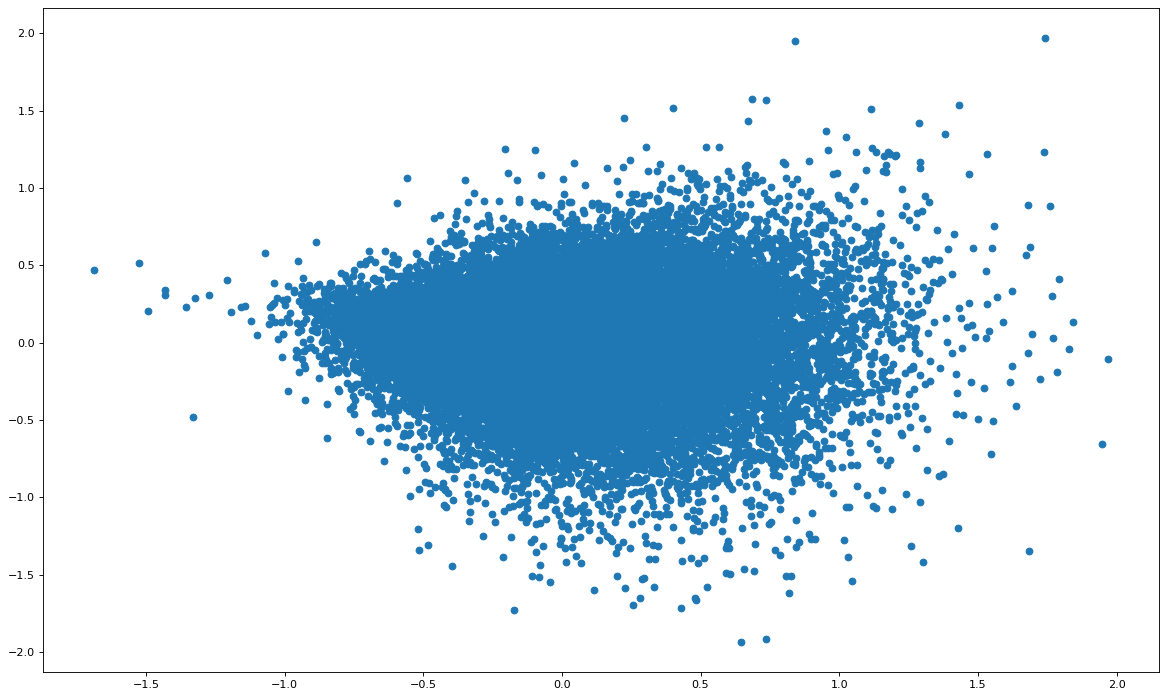

In [49]:
from sklearn.decomposition import PCA

X_pca = PCA().fit_transform(name_50)
plt.figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_pca[:,0], X_pca[:,1])